# Data Understanding

### Import Data

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

client = 'TOOL_CLIENT.csv'
sales  = 'TOOL_SALES.csv'
joint = 'TOOL_JOINT.csv'

In [2]:
df_client = pd.read_csv(client)
df_sales = pd.read_csv(sales)

df = pd.merge(df_client, df_sales, on='CLIENT_ID')

# df = pd.read_csv(joint)

# lower case and replace spaces with underscores in column names
original_columns = df.columns
renamed_columns = [col.lower().replace(" ", "_") for col in original_columns]
column_mapping = dict(zip(original_columns, renamed_columns))
df.rename(columns=column_mapping, inplace=True)

df.head()

/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_22357/751546178.py:2: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df_sales = pd.read_csv(sales)


,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled
0,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,12585,0,C,937.94,P,XBXV2EB,XBXV2EB0102,NaN
1,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,13431,0,C,641.09,P,XBXV2AB,XBXV2AB0102,NaN
2,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,201709,1380,0,C,0.00,P,XBXV2EB,XBXV2EB0102,NaN
3,9306,2005-11-15 00:00:00,BZ,11000,6,8659.81,D,3d,202010,3493,1,C,1341.14,P,XBXV1AF,XBXV1AF0201,NaN
4,939,2005-11-15 00:00:00,LE,15500,2,681.26,E,3d,201705,8241,0,B,64.51,P,XAES4AA,XAES4AA0101,X


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050449 entries, 0 to 2050448
Data columns (total 17 columns):
 #   Column              Dtype  
---  ------              -----  
 0   client_id           int64  
 1   client_create_date  object 
 2   region              object 
 3   trade_sector        int64  
 4   n_employees         int64  
 5   economic_pot        float64
 6   eco_pot_class       object 
 7   risk_cat            object 
 8   yyyymm              int64  
 9   item_id             int64  
 10  flg_tool            int64  
 11  sales_channel       object 
 12  net                 float64
 13  unit                object 
 14  family_code         object 
 15  group_code          object 
 16  cancelled           object 
dtypes: float64(2), int64(6), object(9)
memory usage: 265.9+ MB


In [4]:
# converting date columns to datetime
df['client_create_date'] = pd.to_datetime(df['client_create_date'])
df['yyyymm'] = pd.to_datetime(df['yyyymm'].astype(str), format='%Y%m')
df['client_id'] = df['client_id'].astype(str)
df['cancelled'] = df['cancelled'] == 'X'
df['unit'] = df['unit'] == 'P'

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2050449 entries, 0 to 2050448
Data columns (total 17 columns):
 #   Column              Dtype         
---  ------              -----         
 0   client_id           object        
 1   client_create_date  datetime64[ns]
 2   region              object        
 3   trade_sector        int64         
 4   n_employees         int64         
 5   economic_pot        float64       
 6   eco_pot_class       object        
 7   risk_cat            object        
 8   yyyymm              datetime64[ns]
 9   item_id             int64         
 10  flg_tool            int64         
 11  sales_channel       object        
 12  net                 float64       
 13  unit                bool          
 14  family_code         object        
 15  group_code          object        
 16  cancelled           bool          
dtypes: bool(2), datetime64[ns](2), float64(2), int64(4), object(7)
memory usage: 238.6+ MB


In [6]:
# exporting the merged data

# df.to_csv('TOOL_JOINT.csv', index=False)

Create a new variable to identify client

Create a new variable to identify unique sales

In [7]:
# creating a new column for identifie the unique sales
df['sales_id'] = df['economic_pot'].astype(str) + '_' + df['yyyymm'].dt.strftime('%Y%m')

df.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled,sales_id
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,True,XBXV2EB,XBXV2EB0102,False,8659.81_201709
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,True,XBXV2AB,XBXV2AB0102,False,8659.81_201709
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,True,XBXV2EB,XBXV2EB0102,False,8659.81_201709
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,True,XBXV1AF,XBXV1AF0201,False,8659.81_202010
4,939,2005-11-15,LE,15500,2,681.26,E,3d,2017-05-01,8241,0,B,64.51,True,XAES4AA,XAES4AA0101,True,681.26_201705


In [8]:
# creating new dataframes with no canceled orders
no_canceled = df[df['cancelled'] == False]
no_canceled.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled,sales_id
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,True,XBXV2EB,XBXV2EB0102,False,8659.81_201709
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,True,XBXV2AB,XBXV2AB0102,False,8659.81_201709
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,True,XBXV2EB,XBXV2EB0102,False,8659.81_201709
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,True,XBXV1AF,XBXV1AF0201,False,8659.81_202010
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,True,XBSI4AA,XBSI4AA0101,False,681.26_201804


In [9]:
# checking the number of unique sales per client
client_sales_count = no_canceled.groupby('client_id')['sales_id'].nunique().sort_values(ascending=False)
print(client_sales_count)

client_id
51708    60
19562    58
9659     58
27926    58
37126    57
         ..
39817     1
7320      1
73199     1
56057     1
1         1
Name: sales_id, Length: 85714, dtype: int64


In [10]:
client_sales_count.describe()

count    85714.000000
mean         5.147432
std          6.579728
min          1.000000
25%          1.000000
50%          2.000000
75%          6.000000
max         60.000000
Name: sales_id, dtype: float64

In [11]:
# filtering the clients with more than one sale
client_sales_count.drop(client_sales_count[client_sales_count < 2].index, inplace=True)

pluri_client = no_canceled[no_canceled['client_id'].isin(client_sales_count.index)]
pluri_client['n_purchases'] = pluri_client.groupby('client_id')['sales_id'].transform('nunique')

print(pluri_client.shape)
print(pluri_client.info())

(1840920, 19)
<class 'pandas.core.frame.DataFrame'>
Index: 1840920 entries, 0 to 2048901
Data columns (total 19 columns):
 #   Column              Dtype         
---  ------              -----         
 0   client_id           object        
 1   client_create_date  datetime64[ns]
 2   region              object        
 3   trade_sector        int64         
 4   n_employees         int64         
 5   economic_pot        float64       
 6   eco_pot_class       object        
 7   risk_cat            object        
 8   yyyymm              datetime64[ns]
 9   item_id             int64         
 10  flg_tool            int64         
 11  sales_channel       object        
 12  net                 float64       
 13  unit                bool          
 14  family_code         object        
 15  group_code          object        
 16  cancelled           bool          
 17  sales_id            object        
 18  n_purchases         int64         
dtypes: bool(2), datetime64[ns](2), fl

/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_22357/581676336.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client['n_purchases'] = pluri_client.groupby('client_id')['sales_id'].transform('nunique')


In [12]:
pluri_client.head()

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,unit,family_code,group_code,cancelled,sales_id,n_purchases
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,True,XBXV2EB,XBXV2EB0102,False,8659.81_201709,2
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,True,XBXV2AB,XBXV2AB0102,False,8659.81_201709,2
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,True,XBXV2EB,XBXV2EB0102,False,8659.81_201709,2
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,True,XBXV1AF,XBXV1AF0201,False,8659.81_202010,2
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,True,XBSI4AA,XBSI4AA0101,False,681.26_201804,7


In [13]:
for c in pluri_client.columns:
    print(c)
    print(pluri_client[c].value_counts())

client_id
client_id
49196    2616
51708     997
48285     783
48195     737
45393     674
         ... 
54068       2
54022       2
81962       2
53989       2
92957       2
Name: count, Length: 55359, dtype: int64
client_create_date
client_create_date
2005-11-15    334061
2005-11-16    235874
2007-06-03      9872
2007-06-05      5471
2007-06-06      5455
               ...  
2020-04-23         2
2021-04-23         2
2016-12-10         2
2008-08-22         2
2021-10-20         2
Name: count, Length: 4014, dtype: int64
region
region
RM    76280
MI    73463
FI    68694
BO    55645
TO    53980
      ...  
2A       27
03       25
06        8
08        6
ST        3
Name: count, Length: 115, dtype: int64
trade_sector
trade_sector
11000    647069
13500    267414
21100    228873
22100    140754
15100     81162
          ...  
38000         9
37420         8
39700         6
39000         4
12100         2
Name: count, Length: 145, dtype: int64
n_employees
n_employees
1       366620
2       295

We have now a new dataset cointaining only client with more than one purchase

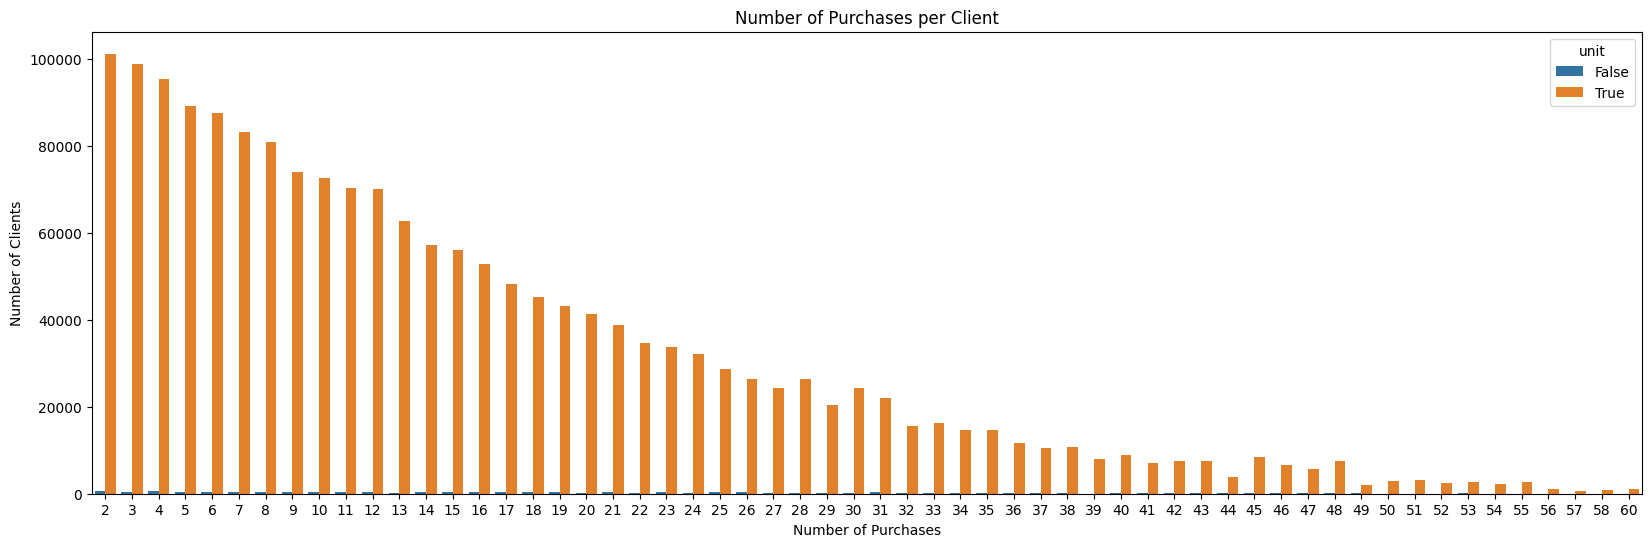

In [14]:
plt.figure(figsize=(20, 6))
sns.countplot(x='n_purchases', data=pluri_client, hue='unit')
plt.xlabel('Number of Purchases')
plt.ylabel('Number of Clients')
plt.title('Number of Purchases per Client')
plt.show()

On this point I'd like asking business about articles that aren't "Unit". I suppose that could be substitute parts for other articles or similar, which a client buys because it absolutly needs it and a marketing campaign about is unuseful. So I decide to drop rows containing non-piece units

In [15]:
# dropping unnecessary columns
pluri_client.drop(pluri_client[pluri_client['unit'] == False].index, inplace=True)
pluri_client.drop('unit', axis=1, inplace=True)
pluri_client.drop('cancelled', axis=1, inplace=True)

pluri_client.head()

/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_22357/4086462661.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client.drop(pluri_client[pluri_client['unit'] == False].index, inplace=True)
/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_22357/4086462661.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client.drop('unit', axis=1, inplace=True)
/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_22357/4086462661.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/p

,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,8659.81_201709,2
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,8659.81_201709,2
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,8659.81_201709,2
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,8659.81_202010,2
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,681.26_201804,7


In [16]:
pluri_client.shape

(1827763, 17)

### Next steps: 
- Days since last purchase for same client
- Analyze time between purchases

- Create a DF with total amount for each sales_id

In [17]:
# extracting new variables
sales_net = pluri_client.groupby('sales_id')['net'].sum()   # total sales per sale
sales_n_purchases = pluri_client.groupby('sales_id')['n_purchases'].max()   # number of purchases per sale

sales_time = pluri_client[['sales_id', 'client_id', 'yyyymm']].drop_duplicates().set_index('client_id')   # time of the sale
sales_time = sales_time.sort_values(by=['client_id', 'yyyymm'])

sales_time['time_diff'] = sales_time.groupby('client_id')['yyyymm'].diff().dt.days  # time between sales
sales_id_time_diff = sales_time[['sales_id', 'time_diff']].set_index('sales_id')    # time between sales per sale (to easly merge with the main dataframe)

In [18]:
# adding the new variables to the main dataframe
pluri_client['sales_net'] = pluri_client['sales_id'].map(sales_net)
pluri_client['time_diff'] = pluri_client['sales_id'].map(sales_id_time_diff['time_diff'].to_dict())
pluri_client.head()

/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_22357/278983237.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client['sales_net'] = pluri_client['sales_id'].map(sales_net)
/var/folders/nr/4kkf0lts6dj62jvx76l5486h0000gn/T/ipykernel_22357/278983237.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  pluri_client['time_diff'] = pluri_client['sales_id'].map(sales_id_time_diff['time_diff'].to_dict())


,client_id,client_create_date,region,trade_sector,n_employees,economic_pot,eco_pot_class,risk_cat,yyyymm,item_id,flg_tool,sales_channel,net,family_code,group_code,sales_id,n_purchases,sales_net,time_diff
0,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,12585,0,C,937.94,XBXV2EB,XBXV2EB0102,8659.81_201709,2,186810.74,92.0
1,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,13431,0,C,641.09,XBXV2AB,XBXV2AB0102,8659.81_201709,2,186810.74,92.0
2,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2017-09-01,1380,0,C,0.00,XBXV2EB,XBXV2EB0102,8659.81_201709,2,186810.74,92.0
3,9306,2005-11-15,BZ,11000,6,8659.81,D,3d,2020-10-01,3493,1,C,1341.14,XBXV1AF,XBXV1AF0201,8659.81_202010,2,226206.91,30.0
7,8321,2005-11-15,LE,15500,2,681.26,E,T8,2018-04-01,6776,0,B,20.02,XBSI4AA,XBSI4AA0101,681.26_201804,7,3365.17,NaN


In [19]:
sales_time.info()

<class 'pandas.core.frame.DataFrame'>
Index: 409520 entries, 10 to 9999
Data columns (total 3 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   sales_id   409520 non-null  object        
 1   yyyymm     409520 non-null  datetime64[ns]
 2   time_diff  354184 non-null  float64       
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 12.5+ MB


In [ ]:
# creating a new dataframe for sales
sales_net = sales_net.reset_index()
sales_n_purchases = sales_n_purchases.reset_index()
sales_time.reset_index(inplace=True)

merged = pd.merge(sales_time, sales_net, on='sales_id')
sales = pd.merge(merged, sales_n_purchases, on='sales_id')

df_original = df
df = pluri_client

In [21]:
sales.head(10)

,client_id,sales_id,yyyymm,time_diff,net,n_purchases
0,10,7000.0_201904,2019-04-01,NaN,147891.10,56
1,10,7000.0_202103,2021-03-01,700.0,302025.04,56
2,100,2345.86_201702,2017-02-01,NaN,343.45,18
3,100,2345.86_201804,2018-04-01,424.0,1724.73,21
4,100,2345.86_201904,2019-04-01,365.0,4181.73,21
5,100,2345.86_201905,2019-05-01,30.0,977.75,21
6,100,2345.86_202104,2021-04-01,701.0,934.34,5
7,10000,1509.51_201701,2017-01-01,NaN,131364.85,38
8,10000,1509.51_201711,2017-11-01,304.0,236812.07,38
9,10000,1509.51_201712,2017-12-01,30.0,193968.75,37


P.S. de-comment the follow cell to save files

In [ ]:
# sales.to_csv('sales.csv', index=False)
# pluri_client.to_csv('TOOLS_PREP.csv', index=False)

Now we have 2 DataFrame to use for our analysis
- df: the complete DataFrame with all the variables
- sales: the DataFrame with the details of sales